## Using third-party code

* The standard library contains many useful things, but there is much more
* The `requests` module is one of the most widely used modules, but it is not part of python
    * https://github.com/kennethreitz/requests
* You install external packages with `conda` or `pip`
    * https://pypi.python.org/pypi
    * https://docs.continuum.io/anaconda/pkg-docs
* We will be using `pandas` and `numpy`
    * http://pandas.pydata.org/
    * https://github.com/numpy/numpy
* https://pypi.python.org/pypi/yahoo-finance/1.3.2

In [139]:
!pip install yahoo-finance

    100% |████████████████████████████████| 81kB 3.0MB/s 
  Running setup.py bdist_wheel for yahoo-finance ... - \ done
  Stored in directory: /home/gijs/.cache/pip/wheels/57/c6/1c/7e87ec3a335379b28239be6595e7167e33656957271cd48de4
  Running setup.py bdist_wheel for simplejson ... - \ | done
  Stored in directory: /home/gijs/.cache/pip/wheels/43/c5/ef/edcebbb19becffd2ba75bf219afdbb4ca85198b2d909f1b31b
Successfully built yahoo-finance simplejson


In [47]:
!conda install requests

Using Anaconda API: https://api.anaconda.org
Fetching package metadata .........
Solving package specifications: ..........

Package plan for installation in environment /home/gijs/anaconda3:

The following packages will be UPDATED:

    conda:     4.1.12-py35_0      conda-forge --> 4.2.12-py35_0            
    conda-env: 2.5.2-py35_0       conda-forge --> 2.6.0-0                  

The following packages will be SUPERCEDED by a higher-priority channel:

    pandas:    0.19.1-np111py35_0 conda-forge --> 0.19.0-py35_intel_1 intel [intel]

Proceed ([y]/n)? ^C
Operation aborted.  Exiting.



In [59]:
from yahoo_finance import Share

yahoo = Share('YHOO')
hist = yahoo.get_historical('2016-08-11', '2016-11-10')
hist

[{'Adj_Close': '40.16',
  'Close': '40.16',
  'Date': '2016-11-10',
  'High': '41.650002',
  'Low': '39.540001',
  'Open': '41.549999',
  'Symbol': 'YHOO',
  'Volume': '16441900'},
 {'Adj_Close': '41.209999',
  'Close': '41.209999',
  'Date': '2016-11-09',
  'High': '41.389999',
  'Low': '40.220001',
  'Open': '40.439999',
  'Symbol': 'YHOO',
  'Volume': '23998600'},
 {'Adj_Close': '41.16',
  'Close': '41.16',
  'Date': '2016-11-08',
  'High': '41.279999',
  'Low': '40.68',
  'Open': '40.970001',
  'Symbol': 'YHOO',
  'Volume': '4227100'},
 {'Adj_Close': '41.049999',
  'Close': '41.049999',
  'Date': '2016-11-07',
  'High': '41.23',
  'Low': '40.860001',
  'Open': '41.169998',
  'Symbol': 'YHOO',
  'Volume': '5388700'},
 {'Adj_Close': '40.279999',
  'Close': '40.279999',
  'Date': '2016-11-04',
  'High': '40.669998',
  'Low': '39.799999',
  'Open': '39.959999',
  'Symbol': 'YHOO',
  'Volume': '4574200'},
 {'Adj_Close': '40.23',
  'Close': '40.23',
  'Date': '2016-11-03',
  'High': '40.

In [60]:
import pandas as pd

df = pd.DataFrame(hist)

df.head(3)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,40.16,40.16,2016-11-10,41.650002,39.540001,41.549999,YHOO,16441900
1,41.209999,41.209999,2016-11-09,41.389999,40.220001,40.439999,YHOO,23998600
2,41.16,41.16,2016-11-08,41.279999,40.68,40.970001,YHOO,4227100


In [61]:
type(df)

pandas.core.frame.DataFrame

In [62]:
## This magic function does a couple of things. 
## It imports the numpy package and some other packages. 
## Also, with this, your plots appear in the notebook. 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 8 Text xticklabel objects>)

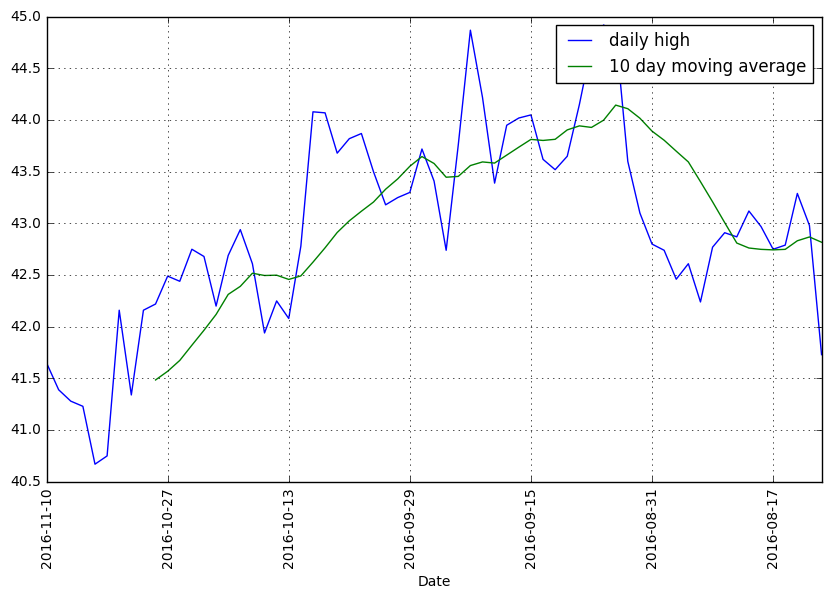

In [67]:
series = pd.to_numeric(df.set_index('Date').High)

series.plot(label='daily high', figsize=(10, 6))
series.rolling(window=10).mean().plot(label='10 day moving average')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)